# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman

...

### import modules

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### set defaults

In [3]:
sns.set_context('poster')
sns.set_style('ticks')

### load data

In [4]:
dataset = '../data/feelingOld.csv'

In [5]:
df = pd.read_csv (dataset)

### clean up

In [6]:
clean_df = df.drop('Consent',axis=1)
clean_df.loc[:,'gender'] = [['male', 'female']['fem' in x.lower()] for x in clean_df.loc[:, 'gender']]
clean_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild
190,5,50,80,23,female,1
191,4,50,60,49,male,2
192,3,70,100,55,female,5
193,5,69,80,69,male,3
194,5,40,60,41,male,0


### transform

In [8]:
clean_df.loc[:,'ageBin'] = pd.cut(clean_df.loc[:,'age'],bins=range(0,100,10))

In [9]:
clean_df.loc[:,'oldBeginBin'] = pd.cut(clean_df.loc[:,'oldBegin'],bins=range(0,100,10))

In [10]:
count_df = clean_df.groupby('ageBin').count()
count_df.loc[:,'ageBin'] = count_df.index
count_df

,ageFeel,oldBegin,oldReally,age,gender,numChild,oldBeginBin,ageBin
ageBin,,,,,,,,
"(0, 10]",0,0,0,0,0,0,0,"(0, 10]"
"(10, 20]",2,2,2,2,2,2,2,"(10, 20]"
"(20, 30]",72,72,72,72,72,72,72,"(20, 30]"
"(30, 40]",61,61,61,61,61,61,61,"(30, 40]"
"(40, 50]",29,29,29,29,29,29,29,"(40, 50]"
"(50, 60]",22,22,22,22,22,22,22,"(50, 60]"
"(60, 70]",6,6,6,6,6,6,6,"(60, 70]"
"(70, 80]",3,3,3,3,3,3,3,"(70, 80]"
"(80, 90]",0,0,0,0,0,0,0,"(80, 90]"


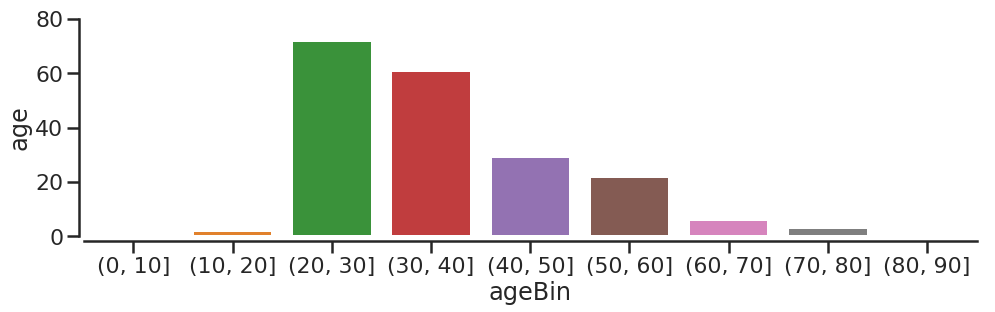

In [11]:
plt.figure(figsize=(16,4))
sns.barplot(data=count_df,x='ageBin',y='age')
sns.despine(offset=5)
plt.ylim(0,80)
plt.show()

### explore

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


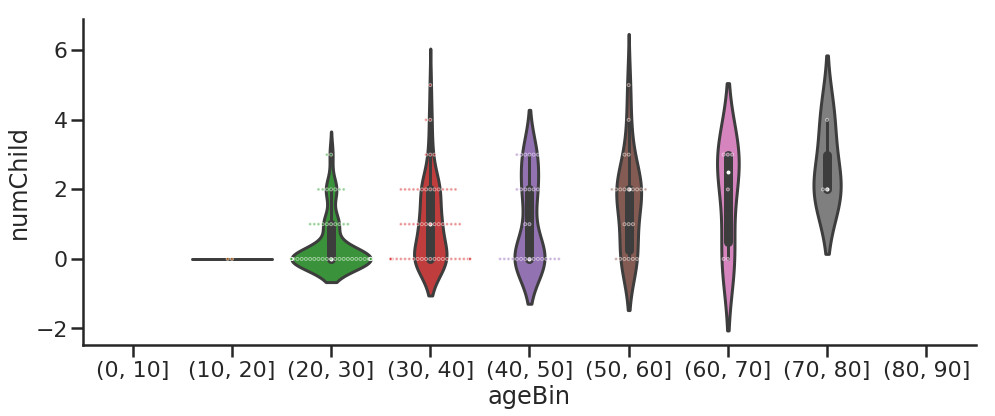

In [12]:
plt.figure(figsize=(16,6))
#sns.barplot(data=clean_df,x='ageBin',y='numChild')
sns.violinplot(data=clean_df,x='ageBin',y='numChild')
#sns.boxplot(data=clean_df,x='ageBin',y='numChild',notch=True)
sns.swarmplot(data=clean_df,x='ageBin',y='numChild',linewidth=1,edgecolor='white',alpha=0.5,size=3)
sns.despine()
plt.show()

In [49]:
oldBegin_df = pd.DataFrame( clean_df.groupby(['gender','ageBin','numChild']).mean().loc[:,'oldBegin'] )
oldBegin_df
#eine Tabelle gebildet, die sich in Geschlecht, Alter und Anzahl der Kinder aufteilt

oldBegin
gender ageBin   numChild           
female (0, 10]  0               NaN
                1               NaN
                2               NaN
                3               NaN
                4               NaN
                5               NaN
       (10, 20] 0               NaN
                1               NaN
                2               NaN
                3               NaN
                4               NaN
                5               NaN
       (20, 30] 0         44.866667
                1         35.000000
                2         33.500000
                3         60.000000
                4               NaN
                5               NaN
       (30, 40] 0         44.714286
                1         46.000000
                2         42.428571
                3         55.000000
                4         40.000000
                5         40.000000
       (40, 50] 0         50.000000
                1         50.000000
                2         67.500000
                3         47.500000
                4               NaN
                5               NaN
...                             ...
male   (40, 50] 0         51.666667
                1               NaN
                2         47.500000
                3         65.000000
                4               NaN
                5               NaN
       (50, 60] 0         56.200000
                1               NaN
                2         59.000000
                3               NaN
                4               NaN
                5               NaN
       (60, 70] 0         60.000000
                1               NaN
                2               NaN
                3         64.500000
                4               NaN
                5               NaN
       (70, 80] 0               NaN
                1               NaN
                2         60.000000
                3               NaN
                4         79.000000
                5               NaN
       (80, 90] 0               NaN
                1               NaN
                2               NaN
                3               NaN
                4               NaN
                5               NaN

[108 rows x 1 columns]

In [59]:
female_oldBegin_df = oldBegin_df.loc['female',:]
female_oldBegin_df

oldBegin
ageBin   numChild           
(0, 10]  0               NaN
         1               NaN
         2               NaN
         3               NaN
         4               NaN
         5               NaN
(10, 20] 0               NaN
         1               NaN
         2               NaN
         3               NaN
         4               NaN
         5               NaN
(20, 30] 0         44.866667
         1         35.000000
         2         33.500000
         3         60.000000
         4               NaN
         5               NaN
(30, 40] 0         44.714286
         1         46.000000
         2         42.428571
         3         55.000000
         4         40.000000
         5         40.000000
(40, 50] 0         50.000000
         1         50.000000
         2         67.500000
         3         47.500000
         4               NaN
         5               NaN
(50, 60] 0         60.000000
         1         56.666667
         2         63.571429
         3         47.500000
         4         70.000000
         5         70.000000
(60, 70] 0         65.000000
         1               NaN
         2         70.000000
         3         60.000000
         4               NaN
         5               NaN
(70, 80] 0               NaN
         1               NaN
         2         70.000000
         3               NaN
         4               NaN
         5               NaN
(80, 90] 0               NaN
         1               NaN
         2               NaN
         3               NaN
         4               NaN
         5               NaN

In [53]:
male_oldBegin_df = oldBegin_df.loc['male',:]
male_oldBegin_df

oldBegin
ageBin   numChild           
(0, 10]  0               NaN
         1               NaN
         2               NaN
         3               NaN
         4               NaN
         5               NaN
(10, 20] 0         45.000000
         1               NaN
         2               NaN
         3               NaN
         4               NaN
         5               NaN
(20, 30] 0         44.131579
         1         34.285714
         2         39.000000
         3         28.000000
         4               NaN
         5               NaN
(30, 40] 0         45.684211
         1         51.000000
         2         45.000000
         3         60.000000
         4         50.000000
         5               NaN
(40, 50] 0         51.666667
         1               NaN
         2         47.500000
         3         65.000000
         4               NaN
         5               NaN
(50, 60] 0         56.200000
         1               NaN
         2         59.000000
         3               NaN
         4               NaN
         5               NaN
(60, 70] 0         60.000000
         1               NaN
         2               NaN
         3         64.500000
         4               NaN
         5               NaN
(70, 80] 0               NaN
         1               NaN
         2         60.000000
         3               NaN
         4         79.000000
         5               NaN
(80, 90] 0               NaN
         1               NaN
         2               NaN
         3               NaN
         4               NaN
         5               NaN

In [60]:
male_meanOldBegin_df = male_oldBegin_df.unstack(1)
male_meanOldBegin_df

oldBegin                                 
numChild          0          1     2     3     4   5
ageBin                                              
(0, 10]         NaN        NaN   NaN   NaN   NaN NaN
(10, 20]  45.000000        NaN   NaN   NaN   NaN NaN
(20, 30]  44.131579  34.285714  39.0  28.0   NaN NaN
(30, 40]  45.684211  51.000000  45.0  60.0  50.0 NaN
(40, 50]  51.666667        NaN  47.5  65.0   NaN NaN
(50, 60]  56.200000        NaN  59.0   NaN   NaN NaN
(60, 70]  60.000000        NaN   NaN  64.5   NaN NaN
(70, 80]        NaN        NaN  60.0   NaN  79.0 NaN
(80, 90]        NaN        NaN   NaN   NaN   NaN NaN

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [61]:
female_meanOldBegin_df = female_oldBegin_df.unstack(1)
female_meanOldBegin_df

oldBegin                                        
numChild          0          1          2     3     4     5
ageBin                                                     
(0, 10]         NaN        NaN        NaN   NaN   NaN   NaN
(10, 20]        NaN        NaN        NaN   NaN   NaN   NaN
(20, 30]  44.866667  35.000000  33.500000  60.0   NaN   NaN
(30, 40]  44.714286  46.000000  42.428571  55.0  40.0  40.0
(40, 50]  50.000000  50.000000  67.500000  47.5   NaN   NaN
(50, 60]  60.000000  56.666667  63.571429  47.5  70.0  70.0
(60, 70]  65.000000        NaN  70.000000  60.0   NaN   NaN
(70, 80]        NaN        NaN  70.000000   NaN   NaN   NaN
(80, 90]        NaN        NaN        NaN   NaN   NaN   NaN

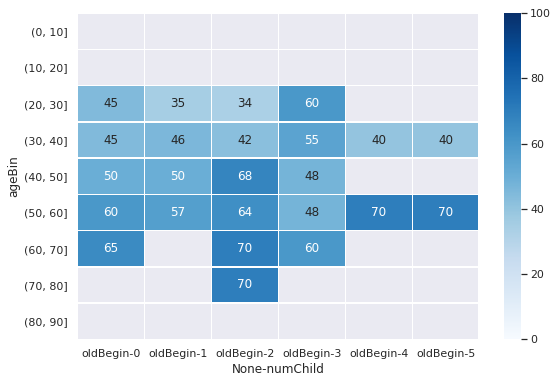

In [62]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(female_meanOldBegin_df, annot=True, linewidths=.5, ax=ax,cmap='Blues',vmin=0,vmax=100)


In [88]:
diff_df = female_meanOldBegin_df-male_meanOldBegin_df
diff_df = diff_df['oldBegin']
diff_df

numChild,0,1,2,3,4,5
ageBin,,,,,,
"(0, 10]",NaN,NaN,NaN,NaN,NaN,NaN
"(10, 20]",NaN,NaN,NaN,NaN,NaN,NaN
"(20, 30]",0.735088,0.714286,-5.500000,32.0,NaN,NaN
"(30, 40]",-0.969925,-5.000000,-2.571429,-5.0,-10.0,NaN
"(40, 50]",-1.666667,NaN,20.000000,-17.5,NaN,NaN
"(50, 60]",3.800000,NaN,4.571429,NaN,NaN,NaN
"(60, 70]",5.000000,NaN,NaN,-4.5,NaN,NaN
"(70, 80]",NaN,NaN,10.000000,NaN,NaN,NaN
"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
my_max = abs(diff_df).max().max()
my_max

In [97]:
sns.set_context('talk')

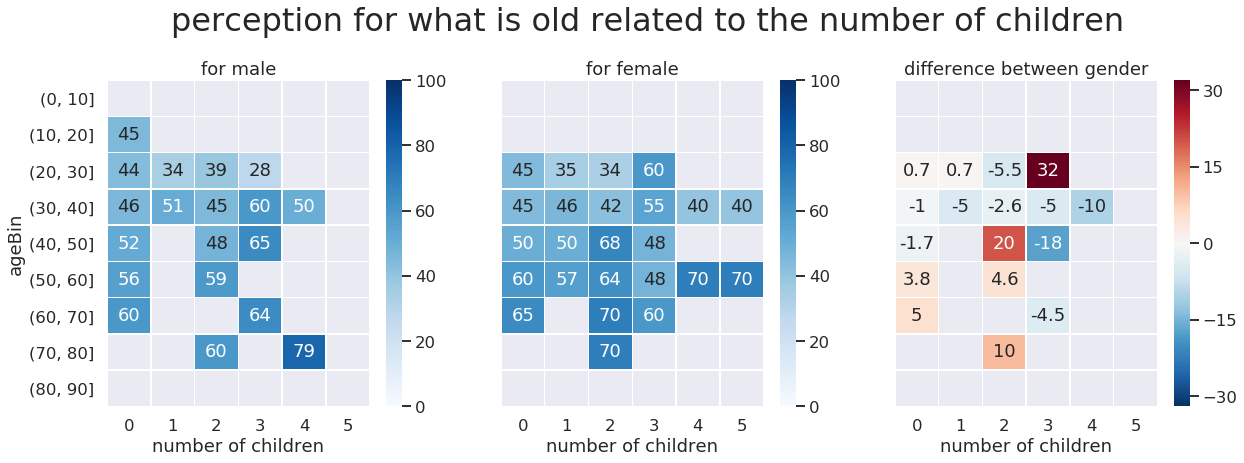

In [115]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20, 6))
sns.heatmap(male_meanOldBegin_df, annot=True, linewidths=.5, ax=ax1,cmap='Blues',vmin=0,vmax=100)
sns.heatmap(female_meanOldBegin_df, annot=True, linewidths=.5, ax=ax2,cmap='Blues',vmin=0,vmax=100)
sns.heatmap(diff_df.round(1), annot=True, linewidths=.5, ax=ax3,cmap='RdBu_r',vmin=-my_max,vmax=my_max)


ax1.set_xticklabels([0,1,2,3,4,5],rotation=360)
ax1.set_xlabel('number of children')

ax2.set_yticklabels([],rotation=360)
ax2.set_ylabel('')

ax3.set_yticklabels([],rotation=360)
ax3.set_ylabel('')

ax1.set_xticklabels([0,1,2,3,4,5],rotation=360)
ax1.set_xlabel('number of children')

ax2.set_xticklabels([0,1,2,3,4,5],rotation=360)
ax2.set_xlabel('number of children')

ax3.set_xticklabels([0,1,2,3,4,5],rotation=360)
ax3.set_xlabel('number of children')

ax1.set_title('for male')

ax2.set_title('for female')

ax3.set_title('difference between gender')

plt.suptitle('perception for what is old related to the number of children',y=1.05,fontsize=32)

plt.show()

In [32]:
sns.heatmap?

## modelling

## visualization

## making sense of the data